# Pandas 2

## Brynn

## Section 002

## 9/12/2023

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1

In [18]:
def prob1():
    """
    Create 3 visualizations of the crime data set.
    One of the visualizations should be a histogram.
    The visualizations should be clearly labelled and easy to understand.
    """
    # read in csv
    df = pd.read_csv("crime_data.csv", index_col='Year')
    df.plot(kind='hist',y=['Murder'], alpha=.7,bins=10,title="Murder Frequency", xlabel="Counts", ylabel= "Years", legend=True)
    df.plot(y=['Burglary'], title = "Burglary Counts during 1960-2016", legend=True)
    plt.xlabel("Total Burglaries by Year")
    plt.ylabel("Number of Years")
    df_temp = df.drop(['Total', 'Population'], axis=1)
    df_temp.plot(linewidth=1,title="Crimes Committed during 1960-2016", legend=True)


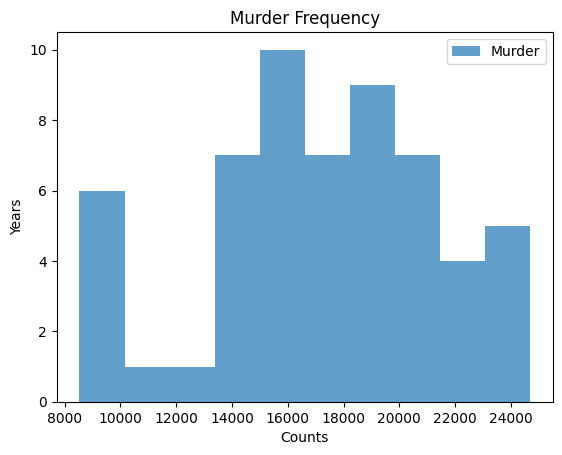

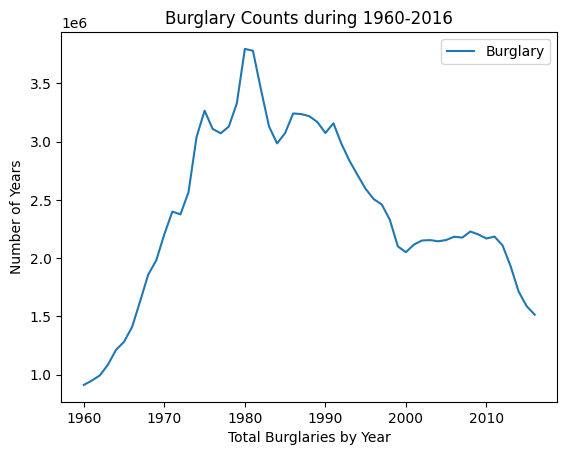

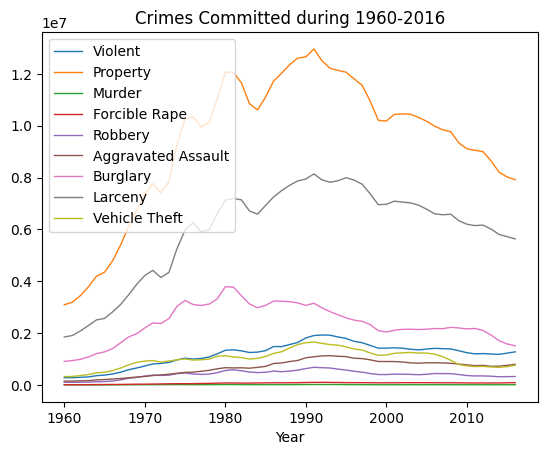

In [19]:
prob1()

# Problem 2

In [24]:
def prob2():
    """
    Use crime_data.csv to plot the trends between Larceny and
        1. Violent
        2. Burglary
        3. Aggravated Assault
    Each graph should be clearly labelled and readable.
    One of these variables does not have a linear trend with Larceny.
    Return a string identifying this variable.
    """
    # read in csv
    df = pd.read_csv("crime_data.csv", index_col='Year')

    # more correlated
    df.plot(kind="scatter", x = "Larceny", y = "Violent", title="Larceny vs Violent Crimes")

    # less correlated, more scattered
    df.plot(kind="scatter", x = "Larceny", y = "Burglary", title="Larceny vs Burglary")

    # more correlated
    df.plot(kind="scatter", x = "Larceny", y = "Aggravated Assault", title="Larceny vs Aggravated Assault")

    return "Burglary"

'Burglary'

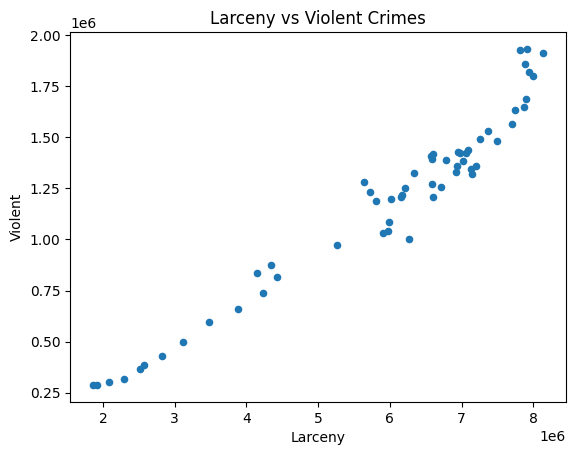

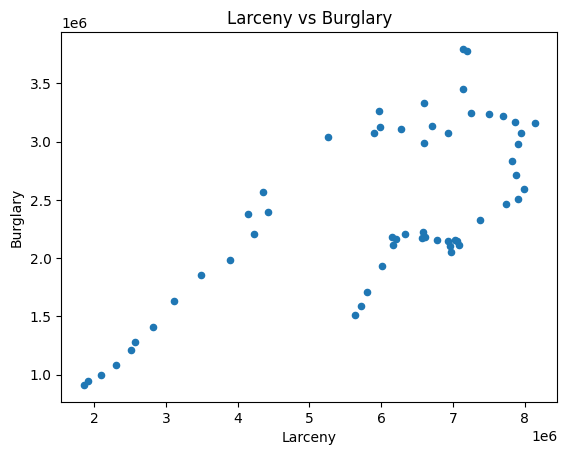

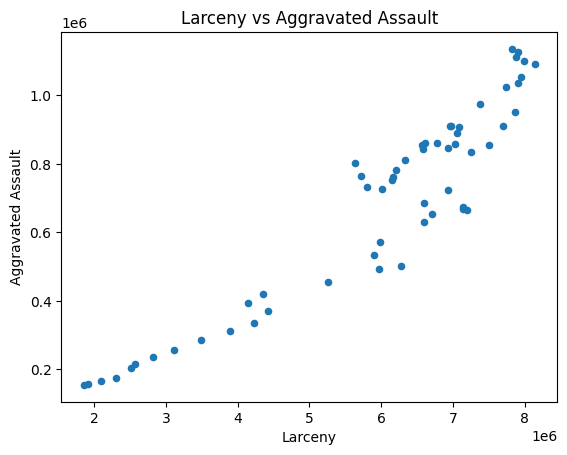

In [25]:
prob2()

# Problem 3

In [26]:
def prob3():
    """
    Use crime_data.csv to display the following distributions.
        1. The distributions of Burglary, Violent, and Vehicle Theft 
            as box plots
        2. The distributions of Vehicle Thefts against Robberies as
            a hexbin plot.
    All plots should be labelled and easy to read.
    """
    # read in csv
    df = pd.read_csv("crime_data.csv", index_col='Year')
    df.plot(kind="box", y=["Burglary","Violent","Vehicle Theft"], vert=False, sharex=False, title="Distributions of Burglary, Violent Crimes, & Vehicle Theft")
    df.plot(kind="hexbin", x="Vehicle Theft", y="Robbery", gridsize=20, sharex=False, title="Distributions of Vehicle Theft vs Robbery")

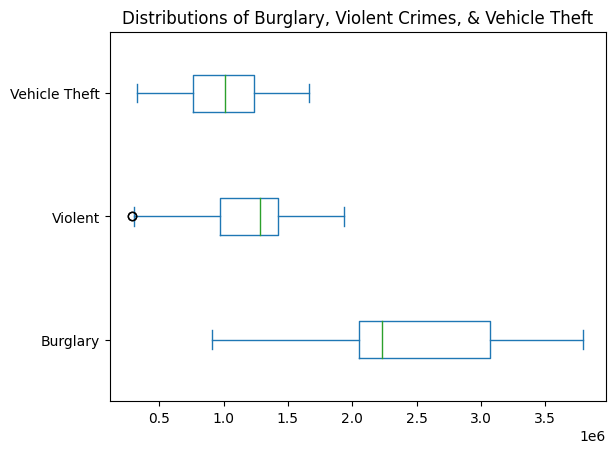

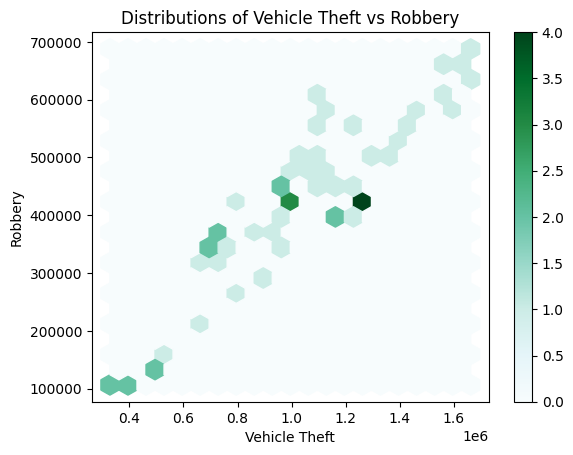

In [27]:
prob3()

# Problem 4

In [112]:
def prob4():
    """
    Create 3 plots that compare variables or universities.
    These plots should answer questions about the data, 
    (e.g. What is the distribution of graduation rates? Do schools 
    with lower student to faculty ratios have higher tuition costs? 
    etc.). These plots should be easy to understand and have clear 
    titles, variable names, and citations.
    """
    df = pd.read_csv("college.csv", index_col=0)

    # filter  dataset to include only private institutions
    priv_inst = df[df['Private'] == 'Yes'].copy()
    priv_inst['cost'] = priv_inst['Room.Board'] + priv_inst['Books'] + priv_inst['Personal']
    priv_inst.drop('Cazenovia College', inplace=True)

    columns = ['Grad.Rate', 'S.F.Ratio', 'Expend','cost']

    # calculate the minimum, maximum, and average values for priv schools + median idk
    min, max, avg, med = priv_inst[columns].min(), priv_inst[columns].max(), priv_inst[columns].mean(),  priv_inst[columns].median()

    byu = priv_inst[priv_inst.index == 'Brigham Young University at Provo'][columns].squeeze()

    # Create a list of variables and their respective average values
    variables = [('Grad.Rate','Graduation Rate'), ('S.F.Ratio', 'Student Faculty Ration'), ('Expend', 'Spending per student'),('cost', 'Costs to students')]

    # Create a grid of charts using a loop
    colors = [['tab:blue', 'tab:orange'], ['tab:blue', 'tab:green'], ['tab:blue', 'tab:purple'],['tab:blue', 'tab:pink']]
    types = ['Average', 'Max', 'Min', 'Median']

    j=0
    
    # loop through avg, max, min, and median to make four plots
    for df in [avg, max, min, med]:
        plt.figure(figsize=(10, 12))  # Adjust the figure size as needed
        # Create a grid of charts using a loop
        for i, variable in enumerate(variables, 1):
            plt.subplot(4, 1, i)
            metric, name = variable[0], variable[1]
            y = ['BYU', f'{types} Priv']
            x=[byu[metric], df[metric] ]
            plt.barh(y, x, color=colors[j])
            #plt.title(f'{name} Comparison')
            plt.xlabel(name)
            plt.tight_layout()

        plt.subplots_adjust(left=0.1,
                            bottom=0.1,
                            right=0.9,
                            top=0.925,
                            hspace=0.5)
        plt.suptitle(f'Metric Comparison between BYU and {types[j]} of Private Institutions', fontsize=16)
        plt.show()
        j +=1

    

1. How do certain measures of BYU compare to the average for Private Institutions? 
2. How do certain measures of BYU compare to the highest Private Institution? 
3. How do certain measures of BYU compare to the lowest Private Institution? 
4. (BONUS) How do certain measures of BYU compare to the median for Private Institutions? 

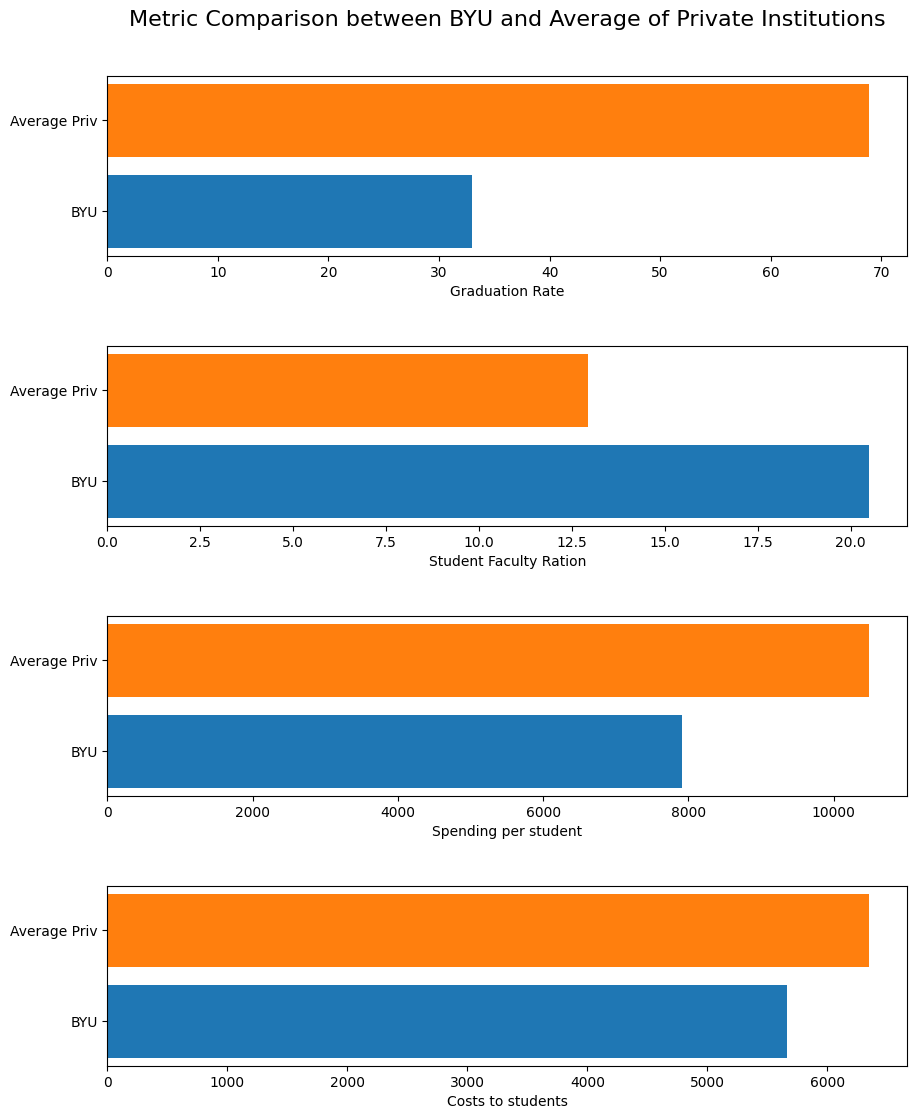

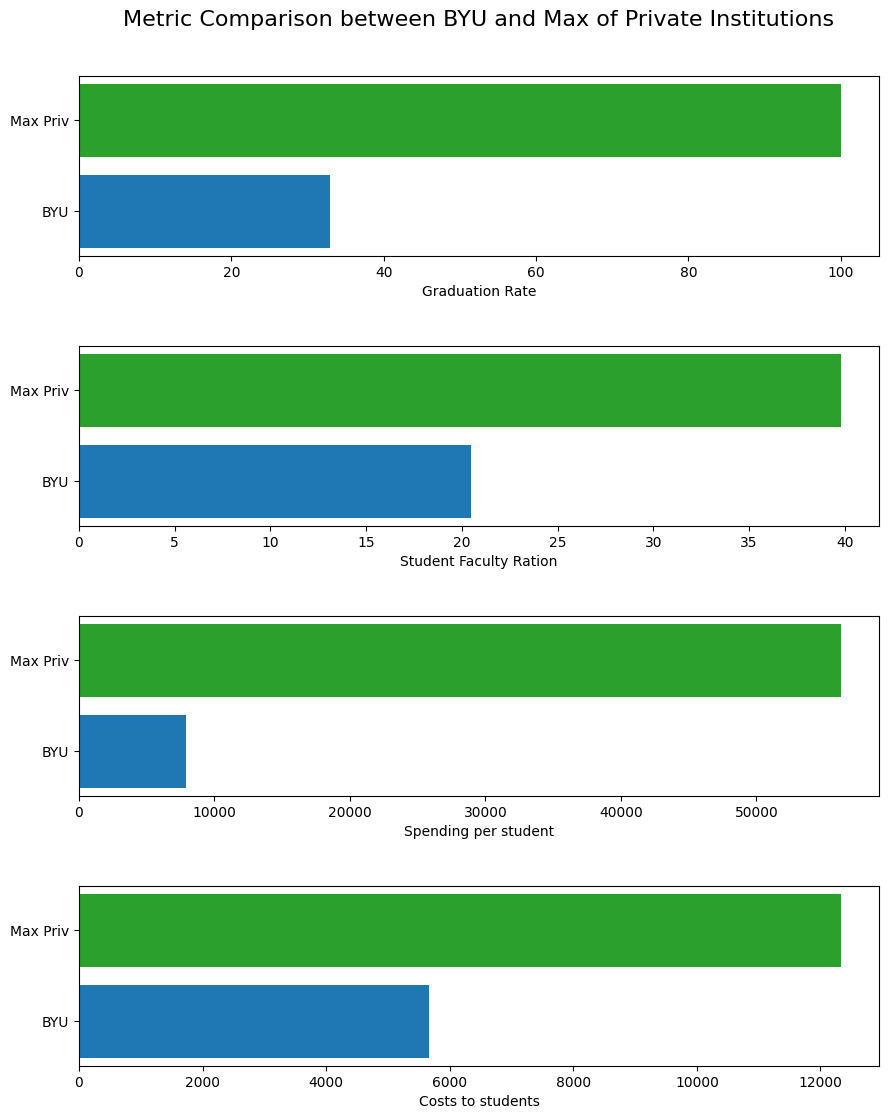

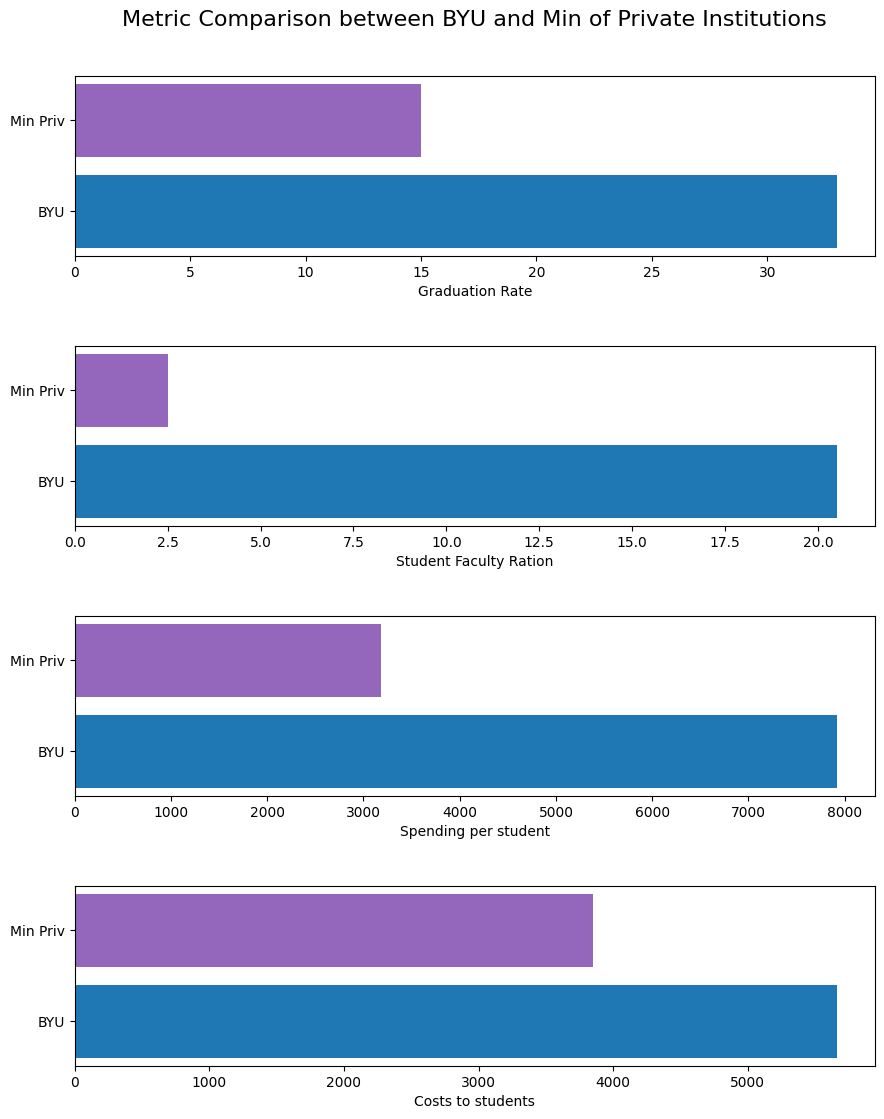

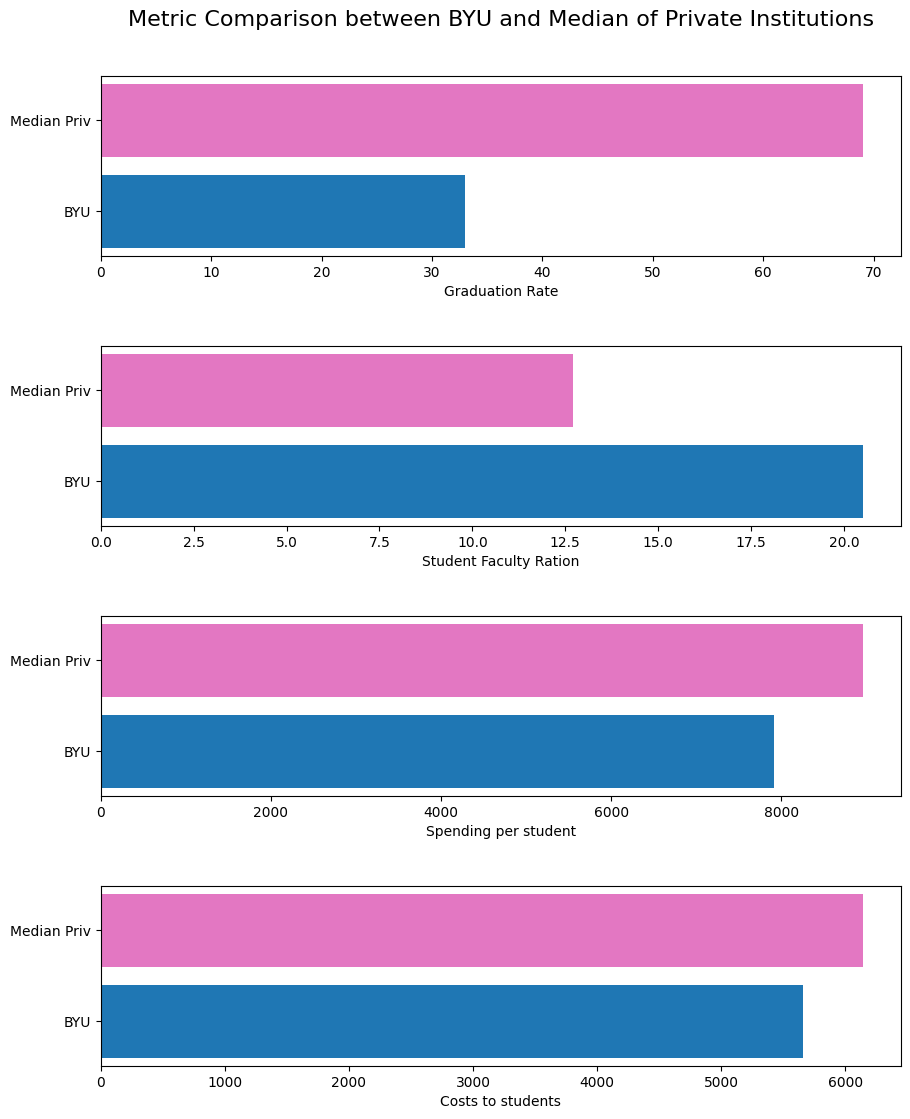

In [111]:
prob4()